In [30]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [31]:
model = tf.keras.models.load_model('Brain_Tumor_Model.keras')

In [32]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 30, 30, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 14, 14, 256)    │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │         6,004 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,490,066 (85.79 MB)

 Trainable params: 7,496,688 (28.60 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,993,378 (57.20 MB)

In [33]:
class_name = ['Glioma', 'Meningioma', 'Normal', 'Pituitary']

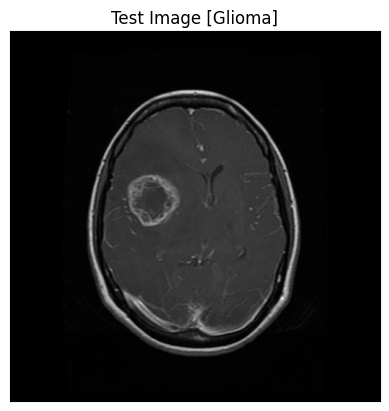

In [34]:
image_path = "Dataset/Test/Glioma/Te-gl_0014.jpg"

img = cv2.imread(image_path)

plt.imshow(img)
plt.title("Test Image [Glioma]")
plt.xticks([])
plt.yticks([])
plt.show()

In [35]:
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
print(input_arr.shape)

(1, 128, 128, 3)


In [36]:
prediction = model.predict(input_arr)
prediction.shape

result_index = np.argmax(prediction)
result_index

model_prediction = class_name[result_index]
model_prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


'Glioma'

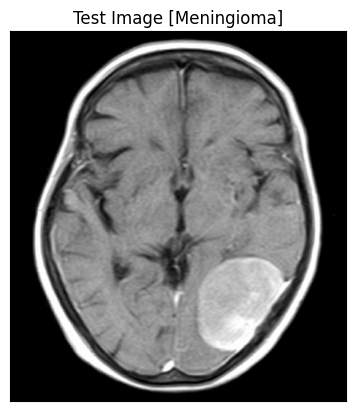

In [37]:
image_path = "Dataset/Test/Meningioma/Te-me_0017.jpg"

img = cv2.imread(image_path)

plt.imshow(img)
plt.title("Test Image [Meningioma]")
plt.xticks([])
plt.yticks([])
plt.show()

In [38]:
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
print(input_arr.shape)

(1, 128, 128, 3)


In [39]:
prediction = model.predict(input_arr)
prediction.shape

result_index = np.argmax(prediction)
result_index

model_prediction = class_name[result_index]
model_prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


'Meningioma'

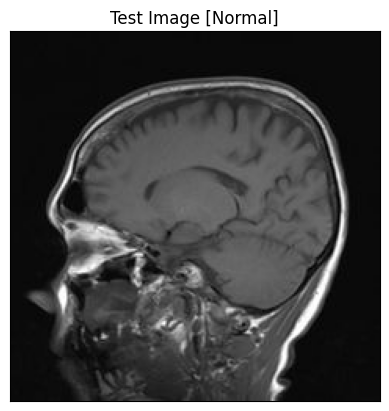

In [40]:
image_path = "Dataset/Test/Normal/Te-no_0015.jpg"

img = cv2.imread(image_path)

plt.imshow(img)
plt.title("Test Image [Normal]")
plt.xticks([])
plt.yticks([])
plt.show()

In [41]:
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
print(input_arr.shape)

(1, 128, 128, 3)


In [42]:
prediction = model.predict(input_arr)
prediction.shape

result_index = np.argmax(prediction)
result_index

model_prediction = class_name[result_index]
model_prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


'Normal'

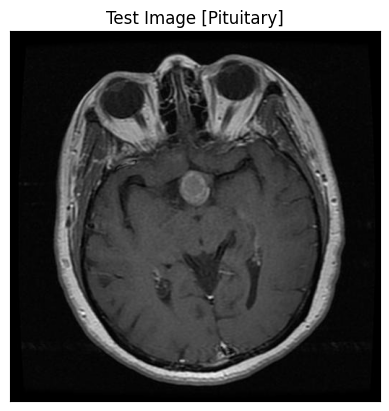

In [44]:
image_path = "Dataset/Test/Pituitary/Te-pi_0015.jpg"

img = cv2.imread(image_path)

plt.imshow(img)
plt.title("Test Image [Pituitary]")
plt.xticks([])
plt.yticks([])
plt.show()

In [45]:
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
print(input_arr.shape)

(1, 128, 128, 3)


In [46]:
prediction = model.predict(input_arr)
prediction.shape

result_index = np.argmax(prediction)
result_index

model_prediction = class_name[result_index]
model_prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


'Pituitary'